In [1]:
import sys  
sys.path.insert(0, '../scripts')
import use_data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# we initialize the parameters for the geodataframe
filename = "simulations_reel_gdf.csv"
gdf = use_data.create_gdf(filename,'itineraire')
dist = 100000

        nbr_etapes
count  1097.000000
mean      6.433911
std       5.456987
min       2.000000
25%       2.000000
50%       5.000000
75%       8.000000
max      41.000000

Nombre de traces directes, i.e. nombre de tournées n'ayant qu'une étape, pour 1097 tournées au total :
298


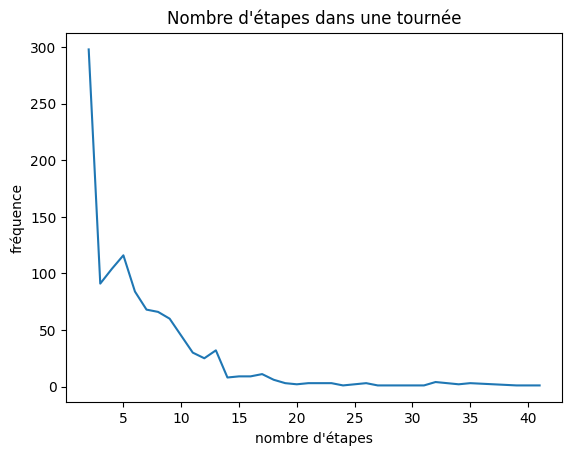

In [3]:
n = gdf.shape[0]
max = 0 # nombre maximum d'étapes dans une tournée
mean = 0 # nombre moyen d'étapes dans une tournée
A = []
for i in range(n):
    tournee = gdf.iloc[[i]]
    linestring = tournee['geometry']
    points = linestring.apply(use_data.line_to_points).explode()
    m = len(points) # nbr d'étapes dans une tournée
    A.append(m)


df = pd.DataFrame(A, columns=['nbr_etapes'])
print(df.describe())

print("\nNombre de traces directes, i.e. nombre de tournées n'ayant qu'une étape, pour "+str(n)+" tournées au total :")
print(A.count(2))


X = np.unique(A)
Y = []
for k in X:
    y = A.count(k)
    Y.append(y)

# Affichage d'une courbe du nombre de tournées en fonction du noombre d'étapes
plt.plot(X, Y)
plt.title("Nombre d'étapes dans une tournée")
plt.xlabel("nombre d'étapes")
plt.ylabel("fréquence")
plt.show()
